# Cancer Dataset

### Importing some basic packages

In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

Reading the csv file and printing top 5 rows in it

In [82]:
df=pd.read_csv("data.csv")
df.head()


,id,clump_thickness,unif_cell_size,unif_cell_shape,marg_adesion,single_epith_cell_size,bare_nuclei,bland_chrom,norm_nuclei,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


Using the shape command we know the no.of row and columns. In this dataset we have 699 rows and 11 columns

In [83]:
df.shape

(699, 11)

This command is used to know how many null values in this data

In [84]:
df.isnull().sum()

id                        0
clump_thickness           0
unif_cell_size            0
unif_cell_shape           0
marg_adesion              0
single_epith_cell_size    0
bare_nuclei               0
bland_chrom               0
norm_nuclei               0
mitoses                   0
class                     0
dtype: int64

## Very Basic analysis

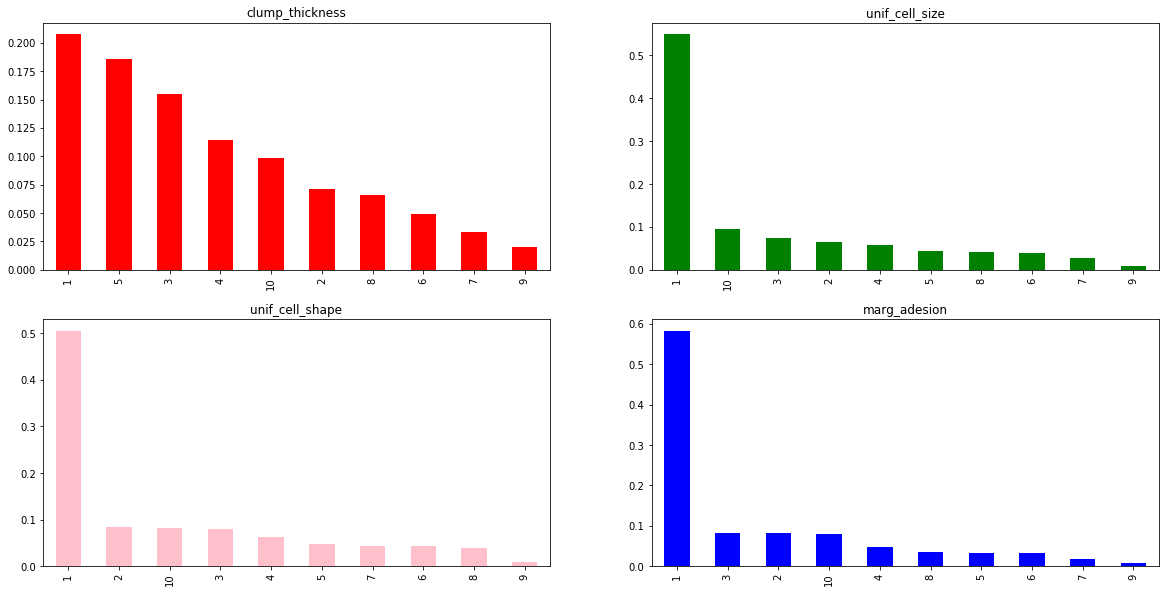

In [85]:
plt.figure(1)
plt.subplot(221)
df['clump_thickness'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'clump_thickness', color="red")

plt.subplot(222)
df['unif_cell_size'].value_counts(normalize=True).plot.bar(title= 'unif_cell_size',color="green")

plt.subplot(223)
df['unif_cell_shape'].value_counts(normalize=True).plot.bar(title= 'unif_cell_shape',color="pink")

plt.subplot(224)
df['marg_adesion'].value_counts(normalize=True).plot.bar(title= 'marg_adesion',color="blue")



plt.show()

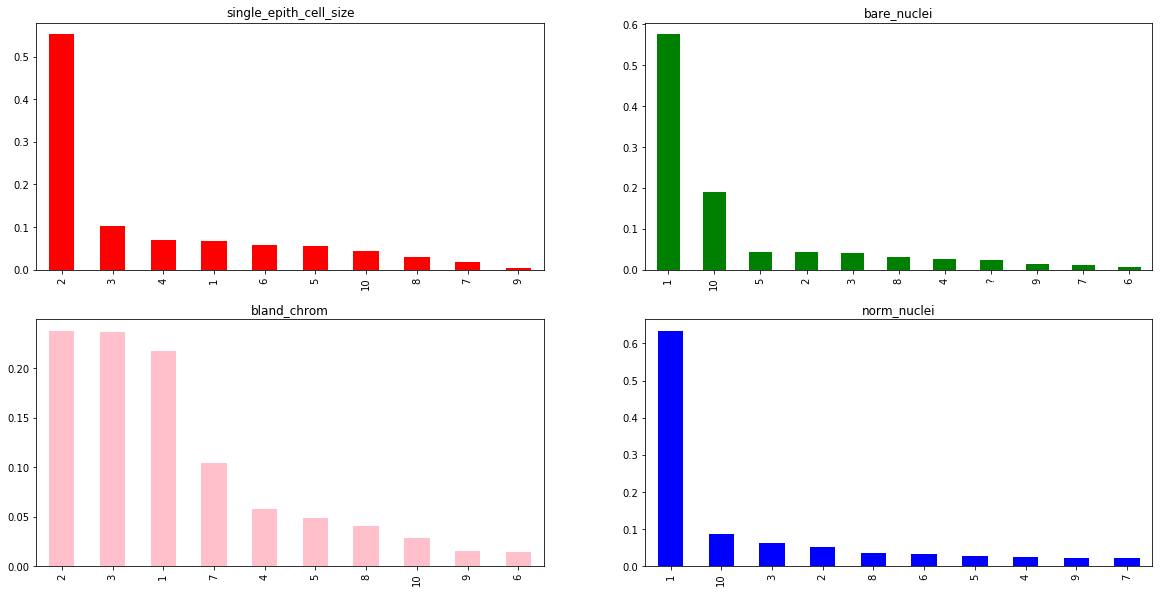

In [86]:
plt.figure(1)
plt.subplot(221)
df['single_epith_cell_size'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'single_epith_cell_size', color="red")

plt.subplot(222)
df['bare_nuclei'].value_counts(normalize=True).plot.bar(title= 'bare_nuclei',color="green")

plt.subplot(223)
df['bland_chrom'].value_counts(normalize=True).plot.bar(title= 'bland_chrom',color="pink")

plt.subplot(224)
df['norm_nuclei'].value_counts(normalize=True).plot.bar(title= 'norm_nuclei',color="blue")



plt.show()

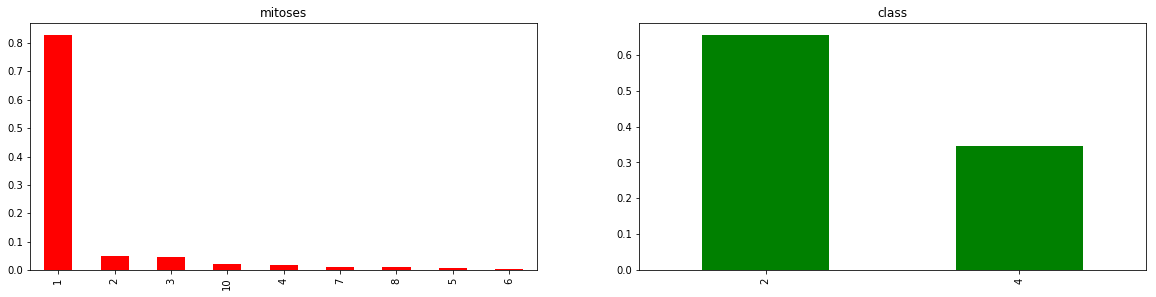

In [87]:
plt.figure(1)
plt.subplot(221)
df['mitoses'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'mitoses', color="red")

plt.subplot(222)
df['class'].value_counts(normalize=True).plot.bar(title= 'class',color="green")

plt.show()

## If we analysis this bar graph we can find one mistake in this dataset. In bare_nuclei column there is ? symbol is there

Always data set should be in numerical then only our algorithm will accept the data

For better understanding. I printed the value_counts in it

In [88]:
df["bare_nuclei"].value_counts()

1     402
10    132
5      30
2      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: bare_nuclei, dtype: int64

### Replaced the ? with 1 

In [89]:
df['bare_nuclei'].replace(('?'), (1),inplace=True)


## Droped the unwanted column

In [90]:
df=df.drop("id",axis=1)
df.head()

,clump_thickness,unif_cell_size,unif_cell_shape,marg_adesion,single_epith_cell_size,bare_nuclei,bland_chrom,norm_nuclei,mitoses,class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


### Here our traget column is class so seprated it into X and y dataset in it

In [91]:
X=df.drop("class",axis=1)
y=df["class"]

In [92]:
X.head()

,clump_thickness,unif_cell_size,unif_cell_shape,marg_adesion,single_epith_cell_size,bare_nuclei,bland_chrom,norm_nuclei,mitoses
0,5,1,1,1,2,1,3,1,1
1,5,4,4,5,7,10,3,2,1
2,3,1,1,1,2,2,3,1,1
3,6,8,8,1,3,4,3,7,1
4,4,1,1,3,2,1,3,1,1


In [93]:
y.head()

0    2
1    2
2    2
3    2
4    2
Name: class, dtype: int64

### Used train and test split command to seprate the data

In [94]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Applied KNeighborsClassifier Algorithm

In [95]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=2)
model.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=2, p=2,
           weights='uniform')

# Accuracy

In [96]:
from sklearn.metrics import accuracy_score
pred_test = model.predict(X_test)
score = accuracy_score(y_test,pred_test)
print('accuracy_score',score)

accuracy_score 0.9307359307359307
